<Body>   
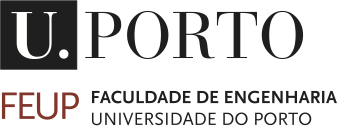   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Mar. 2022

---


#Notebook 08: Artificial Neural Networks

Artificial neural networks (ANNs) are a subset of machine learning and are at the heart of deep learning algorithms. Their structure are inspired by the human brain, mimicking the way that biological neurons signal to one another. A neuron firing is a binary operation that happens if the total signal received at the soma exceeds a given threshold. The neuron either fires or it doesn’t fire. 



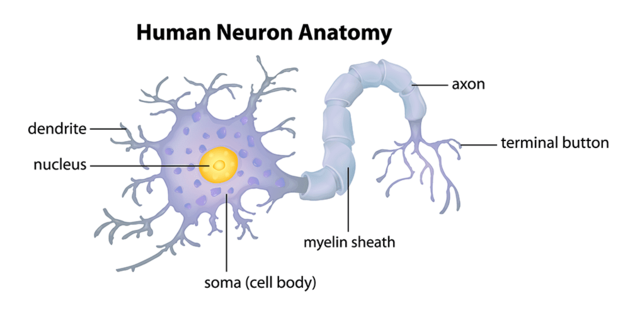

Figure 1 - A biological neuron.





# Neural Network Basics
* Perceptron
* Feedforward neural networks
* Backpropagation
* Training of neural networks

## The Perceptron:
The basic unit of a neural network is a 
$\color{green}{perceptron}$. Each node (or Perceptron) has its own linear regression model which is composed of input data, weights, a bias (or threshold), and an output. 
The mathematical model of a perceptron is
\begin{equation}
y_{pred} = f(\sum_{i = 1}^n w_ix_i+bias)
\end{equation}

The values $x_1$, $x_2$, ..., $x_n$ are the inputs of this node. Each $x$ is connected to a neuron via a weight vector W that is consisted by $w_1$, $w_2$, ..., $w_n$. 
All inputs are then multiplied by their respective weights and then summed.  These weights help to determine the importance of any given variable, with larger ones contributing more significantly to the output compared to other inputs.  Bias is applied to each neuron.

The output of the perceptron is determined by the result of a weighted sum that is passed through  an $\color{green}{activation \text{ } function }$ **f(.)** (which is used to determine if the neuron ''fires'' or not).


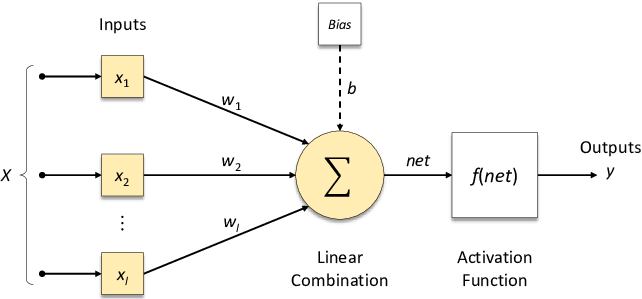

Figure 2 - Perceptron (source: Antonio Rafael Sabino Parmezan)

## Activation Functions

Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. They are mostly differentiable operators to transform input signals to outputs, while most of them add non-linearity.


### ReLU Function
The **rectified linear unit** (*ReLU*) is the most popular choice
due to both simplicity of implementation and
its good performance on a variety of predictive tasks. The ReLU function retains only positive elements and discards all negative elements
by setting the corresponding activations to 0. 

$$\operatorname{ReLU}(x) = \max(x, 0).$$

Given an element $x$, the function is defined as the maximum of that element and $0$. When the input is negative, the derivative of the ReLU function is 0, and when the input is positive, the derivative of the ReLU function is 1. The ReLU function is not differentiable when the input takes value precisely equal to 0. In these cases, we default to the left-hand-side derivative and say that the derivative is 0 when the input is 0. 

Plotting the derivative of the ReLU function below. As you can see, the activation function is piecewise linear.

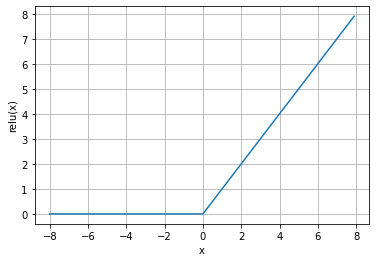

In [ ]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach())
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.grid()
plt.show()

### Sigmoid Function

The **sigmoid function** transforms the inputs (in $\mathbb{R}$ domain) to outputs that lie on the **interval (0, 1)**.

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

The sigmoid function is also a natural choice because it is a smooth, differentiable approximation to a thresholding unit. Sigmoids are still widely used as activation functions on the output units, when we want to interpret the outputs as probabilities for binary classification problems.


The derivative of the sigmoid function is given by the following equation:

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$



Below, we plot the sigmoid function. The sigmoid function approaches a linear transformation when the input is close to 0.


The derivative of the sigmoid function reaches a maximum of 0.25 when the input is 0. The derivative approaches 0 as the input diverges from 0 in either direction.

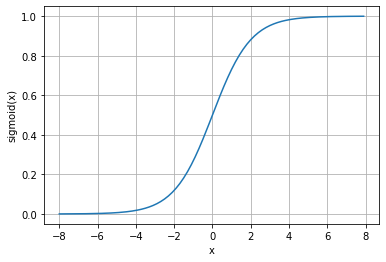

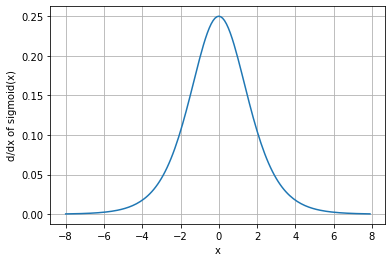

In [ ]:
# Sigmoid
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid()
plt.show()

# Gradient
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad)
plt.xlabel("x")
plt.ylabel("d/dx of sigmoid(x)")
plt.grid()
plt.show()


### Tanh Function

The **tanh** (hyperbolic tangent) function transforms the inputs into elements on the interval **(-1, 1)**. The tanh function exhibits point symmetry about the origin of the coordinate system and the function approaches a linear transformation when the input is near 0.

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$


 The derivative of the tanh function is given by:

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$


The derivative of the tanh function approaches a maximum of 1 when the input is 0.


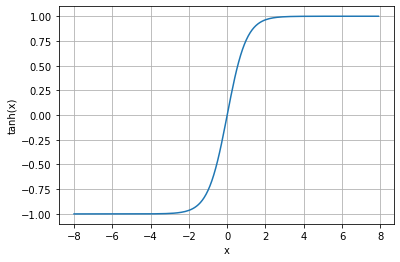

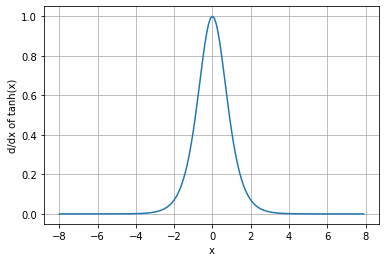

In [ ]:
# Tanh
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.tanh(x)
plt.plot(x.detach(), y.detach())
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid()
plt.show()

# Gradient
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad)
plt.xlabel("x")
plt.ylabel("d/dx of tanh(x)")
plt.grid()
plt.show()

-------------------
## **Activity 1**

Assume a perceptron with two inputs and the sigmoid activation function. Consider the following parameters and compute the output of the node. 
* $x_1$ = 0.5 e $x_2$ = 0.75
* $w_1$ = 0.5 e  $w_2$ = 0.1
* b = 1.5



In [ ]:
# to complete
import numpy as np

x1 = 0.5
x2 = 0.75
w1 = 0.5
w2 = 0.1
b = 1.5

def sigmoid(x):
  return 1/(1+ np.exp(-x))
  
a = x1*w1 + x2*w2 + b
y_pred = sigmoid(a)
print(y_pred)

0.8611650064526928


----------------

# Artificial neural networks (ANNs) 
ANNs are comprised of the following node layers (see Figure 3): 
1. an input layer,
2. one or more hidden layers,
3. an output layer.

## Feedforward neural networks or multi-layer perceptrons (MLPs)
Each node connects to another and when its output is above the specified threshold value, that particular node is activated, passing data to the next layer in the network. Otherwise, no data is passed along to the next layer of the network.  The process of passing data from one layer to the next layer defines a $\color{green}{feedforward \text{ } network}$, where  the result of the output of one node is becoming the input of the next node. 





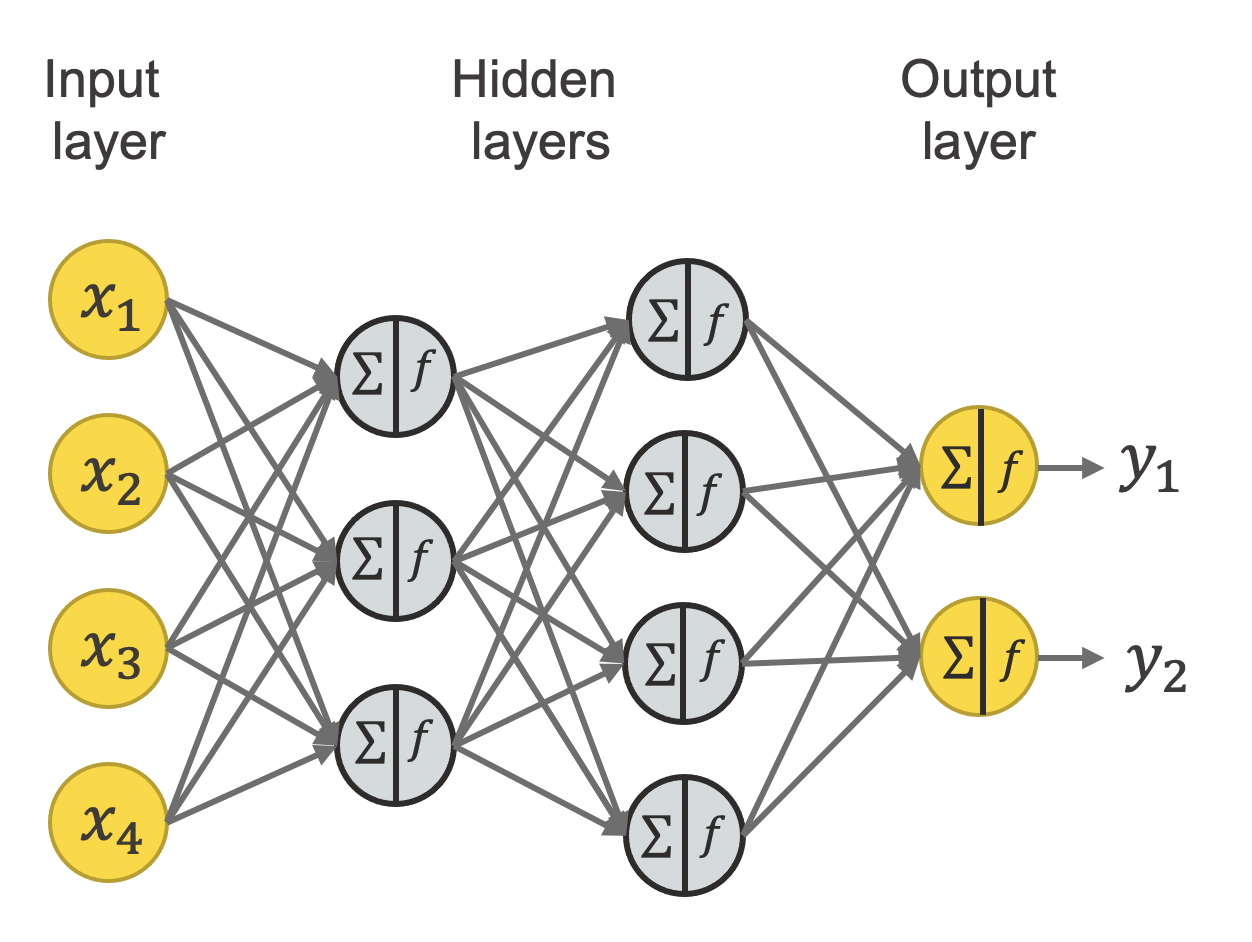

Figure 3 - Feedforward neural network

-------------------
## **Activity 2**

A network with 2 inputs ($x_1$ and $x_2$), one hidden layer with two neurons ($h_1$ and $h_2$) and one output layer ($o_1$), has the following parameters (for all neurons):
* $w = [0.5, 0.8]$
* bias = 0
* sigmoid activation function

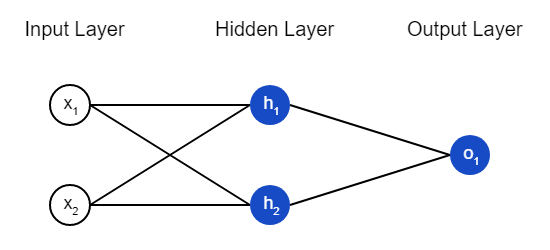

Calculate the feedforward step to this ANN by considering the input values $x = [2, 3]$.

In [ ]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))


class Perceptron:
  '''
  Structure of a Perceptron
    - weights = [x_1, x_2, ... , x_n]
    - b = value
    - sigmoid activation function
  '''
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

In [ ]:
# to complete

class NeuralNetwork:
  '''
  Structure of the neural network:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  Neurons have the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0.5, 0.8])
    bias = 0

    # Create Neurons
    self.h1 = Perceptron(weights, bias)
    self.h2 = Perceptron(weights, bias)
    self.o1 = Perceptron(weights, bias)

  # Feedforward step
  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

model = NeuralNetwork()
x = np.array([2, 3])
print(model.feedforward(x)) # 0.7786843662249748

0.7786843662249748


-----------------

# Training ANN

Neural networks rely on training data to learn and improve their accuracy over time. This means that the weights of the neurons are updated iteratively during the training stage based on performance metrics such as, the mean squared error (MSE) loss

\begin{equation}
MSE = \frac{1}{n}\sum_{i = 1}^n (y - y_{pred})^2
\end{equation}

where $y$ is the true value of the variable (the correct answer) and $y_{pred}$ is the predicted value of the variable (the network's output). 

-------------------
## **Activity 3**



A training set of the physical development for 12-year-old childs comprises:

|Name | Height (m) | Weight (kg) | Gender |
|----|:------------|:----------|:-------|
|Joana| 113| 55| F|
|Maria| 100| 50| F|
|Miguel| 140| 62| M|
|Pedro| 132| 60| M|

Compute the MSE loss considering that the results of the ANN are:

|Name | $y$ | $y_{pred}$|
|----|:------------|:----------|
|Joana| 1| 0|
|Maria| 1| 0|
|Miguel| 0| 0|
|Pedro| 0| 0| 





Note: this data can be shifted (or normalized) to make it easier to use. In addition, the classes 'Male' or 'Female' can be represented as 0 or 1, respectively.

|Name | Height (m) - 115 | Weight (kg) - 56 | Gender |
|----|:------------|:----------|:-------|
|Joana| -2| -1| 1|
|Maria| -15| -6| 1|
|Miguel| 25| 6| 0|
|Pedro| 17| 4| 0|


In [ ]:
# to complete
import numpy as np

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  y_pred = (y_true-y_pred)**2
  return y_pred.mean()

y_true = np.array([1, 1, 0, 0])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


--------------------

The training stage makes it possible to minimize the loss function, by adjusting the weights and bias accordingly. Ultimately, the goal is to minimize our cost function to ensure correctness of fit for any given observation. As the model adjusts its weights and bias, it uses the cost function to reach the point of convergence, or the local minimum. The process in which the algorithm adjusts its weights is through gradient descent, allowing the model to determine the direction to take to reduce errors (or minimize the cost function). With each training example, the parameters of the model adjust to gradually converge to the minimum.  

Using a previous example:

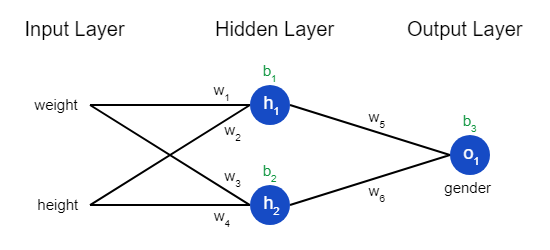

## Backpropagation

The loss function can be written as a multivariable function:
$ L(w_1, w_2, w_3, w_4, w_5, w_6, b_1, b_2, b_3)$



Assume that **$w_1$** needs to be adjusted by taking into consideration the 'Joana' observation. 

The $\color{green}{backpropagation}$ is the method of fine-tuning the weights of a neural network based on the error rate obtained in the previous epoch. The method will estimate the error at the end of the ANN and then, it will propagate this error backwards (based on gradient of a loss function) using the **Chain Rule** of derivate. 

|Name | Weight(kg) - 115 | Height(m) - 56 | Gender |
|----|:------------|:----------|:-------|
|Joana| -2| -1| 1|

1. Thus, the MSE can be determined by:

\begin{equation}
MSE = L(\cdot) = (y - y_{pred})^2 = (1- y_{pred})^2
\end{equation}



2. The partial derivative $\frac{\partial L}{\partial w_1}$ is given by:
\begin{equation}
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}}\frac{\partial y_{pred}}{\partial w_1}
\end{equation}

where
* $\frac{\partial L}{\partial y_{pred}} = \frac{\partial (1- y_{pred})^2}{ \partial y_{pred}} = -2(1-y_{pred})$
* $y_{pred} = o_1 = f(w_5h_1 + w_6h_2+b_3)$, and f is a sigmoid function.






3. The $w_1$ is only affecting $h_1$:

\begin{equation}
\color{red}{
\frac{\partial y_{pred}}{\partial w_1} = \frac{\partial y_{pred}}{\partial h_1}\frac{\partial h_1}{\partial w_1}
}
\end{equation}

where
* $\frac{\partial y_{pred}}{d h_1} = w_5 f'(w_5h_1 + w_6h_2+b_3) $
* $h_1 = f(w_1x_1 + w_2x_2 + b_1)$
* $\frac{\partial h_1}{\partial w_1}  = x_1  f'(w_1x_1 + w_2x_2 + b_1)$

The derivate of the sigmoid function $f'(z)$:
\begin{equation}
f'(z) = \frac{e^{-z}}{(1+e^{-z})^2} = f(z)(1-f(z))
\end{equation}

4. Therefore, 
\begin{equation}
\color{red}{
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}}\frac{\partial y_{pred}}{\partial h_1}\frac{\partial h_1}{\partial w_1}
}
\end{equation}

-------------------
## **Activity 4**

Assuming that all weights of the previous ANN model were initialized to 1 and all bias to 0, please estimate the value of $w_1$ after one training iteration formed by a feedforward pass and a backpropagation. 

-------------------

## Training: Stochastic Gradient Descent

The optimization algorithm called stochastic gradient descent (SGD) determines how to update the weights and biases to minimize loss.

\begin{equation}
\color{green}{
w_1 = w_1 - \eta \frac{dL}{dw_1}
}
\end{equation}

where $\eta$ is the learning rate.

* if $\frac{dL}{dw_1}$ is positive, $w_1$ will decrease (and the loss will decrease).
* if $\frac{dL}{dw_1}$ is negative, $w_1$ will increase (and the loss will decrease).


The ANN are powerful tools in computer science and artificial intelligence once these weights and bias are fine-tuned for accuracy. 


-------------------
## **Demonstrator (ANN)**
A simple ANN implementation for the example provided in this notebook is provided below. All weights and bias are randomly initialized. Please change the learning rate and the number of epochs to verify the performance of the ANN. 

In [ ]:
import numpy as np
np.random.seed(42)

# y_true and y_pred are numpy arrays of the same length.
def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

# Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)

class NeuralNetwork:
  '''
  Structure of the neural network:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  Neurons have the same weights and bias:
    - wi = random
    - bi = random
  '''
  def __init__(self):
    # Biases
    self.b1 = np.random.random()
    self.b2 = np.random.random()
    self.b3 = np.random.random()

    # Weights
    self.w1 = np.random.random()
    self.w2 = np.random.random()
    self.w3 = np.random.random()
    self.w4 = np.random.random()
    self.w5 = np.random.random()
    self.w6 = np.random.random()


  def feedforward(self, x):
    '''
    - x is a numpy array with 2 elements.
    '''
    # Hidden layer
    self.sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
    self.sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
    self.h1 = sigmoid(self.sum_h1)
    self.h2 = sigmoid(self.sum_h2 )

    # Output layer
    self.sum_o1 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.o1 = sigmoid(self.sum_o1)
    return self.o1

  
  def train(self, data, y_trues, learn_rate = 0.1, epochs = 300):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - y_trues is a numpy array with n elements.
      Elements in y_truse correspond to those in data.
    '''
    for epoch in range(epochs):
      for x, y_true in zip(data, y_trues):

        # *************************************************
        # 1. Feedforward Step
        y_pred = self.feedforward(x)  


        # *************************************************
        # 2. Backpropagation Step

        # Partial derivatives.
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Output Layer:  Neuron o1
        d_ypred_d_w5 = self.h1 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w6 = self.h2 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(self.sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(self.sum_o1)

        # Hidden Layer: Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(self.sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(self.sum_h1)
        d_h1_d_b1 = deriv_sigmoid(self.sum_h1)

        # Hidden Layer: Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(self.sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(self.sum_h2)
        d_h2_d_b2 = deriv_sigmoid(self.sum_h2)


        # *************************************************
        # 3. Gradient Descent
        # Output Layer:  Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

        # Hidden Layer: Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Hidden Layer: Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2


      # *************************************************
      # 4. Performance assessment (per epoch)
      if epoch % 5 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(y_trues, y_preds)
        print("Epoch %d  --> Loss: %.4f" % (epoch, loss))


# Create the ANN
model = NeuralNetwork()

# Trainingset: dataset
trainingset_X = np.array([
  [-2, -1],  # Joana
  [-15, -6], # Maria
  [25, 6],   # Miguel
  [17, 4],   # Pedro
])

# Trainingset: labels
trainingset_Y = np.array([
  1, 
  1, 
  0, 
  0, 
])

# Train the ANN
model.train(trainingset_X, trainingset_Y)

Epoch 0  --> Loss: 0.4321
Epoch 5  --> Loss: 0.3319
Epoch 10  --> Loss: 0.2713
Epoch 15  --> Loss: 0.2110
Epoch 20  --> Loss: 0.1642
Epoch 25  --> Loss: 0.1323
Epoch 30  --> Loss: 0.1101
Epoch 35  --> Loss: 0.0938
Epoch 40  --> Loss: 0.0810
Epoch 45  --> Loss: 0.0708
Epoch 50  --> Loss: 0.0625
Epoch 55  --> Loss: 0.0556
Epoch 60  --> Loss: 0.0498
Epoch 65  --> Loss: 0.0450
Epoch 70  --> Loss: 0.0409
Epoch 75  --> Loss: 0.0373
Epoch 80  --> Loss: 0.0343
Epoch 85  --> Loss: 0.0316
Epoch 90  --> Loss: 0.0293
Epoch 95  --> Loss: 0.0272
Epoch 100  --> Loss: 0.0254
Epoch 105  --> Loss: 0.0238
Epoch 110  --> Loss: 0.0224
Epoch 115  --> Loss: 0.0211
Epoch 120  --> Loss: 0.0199
Epoch 125  --> Loss: 0.0189
Epoch 130  --> Loss: 0.0179
Epoch 135  --> Loss: 0.0170
Epoch 140  --> Loss: 0.0162
Epoch 145  --> Loss: 0.0155
Epoch 150  --> Loss: 0.0148
Epoch 155  --> Loss: 0.0142
Epoch 160  --> Loss: 0.0136
Epoch 165  --> Loss: 0.0131
Epoch 170  --> Loss: 0.0126
Epoch 175  --> Loss: 0.0121
Epoch 180  -->

In [ ]:
# Prediction:
jose = np.array([0, 2])  
diana = np.array([-1, -1]) 
carolina = np.array([-3, -2]) 
print("José: %.3f" % model.feedforward(jose)) # 0.116 - M
print("Diana: %.3f" % model.feedforward(diana)) # 0.829 - F
print("Carolina: %.3f" % model.feedforward(carolina)) # 0.897 - F

José: 0.505
Diana: 0.867
Carolina: 0.928


----------------------------